In [1]:
import pandas as pd
import numpy as np

<h3>Date and Time Data Types and Tools</h3>

In [2]:
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt

In [3]:
now = datetime.now()

In [4]:
now

datetime.datetime(2024, 6, 8, 21, 14, 9, 643101)

In [5]:
now.year, now.month, now.day, now.hour, now.minute

(2024, 6, 8, 21, 14)

In [6]:
now.year

2024

In [7]:
# delta
delta = datetime(2024, 5, 21) - datetime(2016, 8, 26, 8, 54)
delta

datetime.timedelta(days=2824, seconds=54360)

In [8]:
# numerical evaluations
start = datetime(2024, 1, 1)
start + timedelta(3000)

datetime.datetime(2032, 3, 19, 0, 0)

<h4>Converting between String and Datetime</h4>

In [9]:
stamp = datetime(2024, 5, 22)

In [10]:
str(stamp)

'2024-05-22 00:00:00'

In [11]:
# Conversion to a specified string format
stamp.strftime("%Y-%B-%d-%u-%A-%p")

'2024-May-22-3-Wednesday-AM'

In [12]:
value = "2024-12-03"

In [13]:
datetime.strptime(value, "%Y-%m-%d")

datetime.datetime(2024, 12, 3, 0, 0)

In [14]:
# converting a list of string dates to datetime format
datestrs = ["7/6/2025", "8/6/2025"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2025, 7, 6, 0, 0), datetime.datetime(2025, 8, 6, 0, 0)]

In [15]:
# pandas to_datetime
datestrs = ["2011-07-06 12:00:00", "2025-08-06 00:00:00"]
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2025-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [16]:
# dataframe to datetime
df = pd.DataFrame(
    {"year": [2025, 2024, 2023],
     "month": [2, 4, 8],
     "day": [5, 4, 5]
    })

In [17]:
df

,year,month,day
0,2025,2,5
1,2024,4,4
2,2023,8,5


In [18]:
pd.to_datetime(df)

0   2025-02-05
1   2024-04-04
2   2023-08-05
dtype: datetime64[ns]

In [19]:
datestr = ["2025-07-06 12:00:00",
           "2034-08-04 13:45:34"]

In [20]:
# Missing values, Not a Time values are also accepted
idx = pd.to_datetime(datestrs + [None])

In [21]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2025-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
# indexing idx
idx[2]

NaT

In [23]:
pd.isna(idx)

array([False, False,  True])

<h4>Time Series Basics</h4>

In [24]:
# time series
dates = [datetime(2024, 6, 2),
        datetime(2025, 10, 21),
        datetime(2024, 4, 12),
        datetime(2023, 10, 5),
        datetime(2016, 11, 3),
        datetime(2017, 3, 15),
        datetime(2019, 6, 3),
        datetime(2020, 5, 8),
       ]

In [25]:
ts =pd.Series(np.random.standard_normal(8),
              index=dates,
             )

In [26]:
ts

2024-06-02   -0.139339
2025-10-21   -0.600469
2024-04-12    0.154711
2023-10-05   -0.554223
2016-11-03   -1.021803
2017-03-15    1.149775
2019-06-03   -1.591196
2020-05-08   -0.074195
dtype: float64

In [27]:
ts + ts[::3]

2016-11-03         NaN
2017-03-15         NaN
2019-06-03   -3.182393
2020-05-08         NaN
2023-10-05   -1.108447
2024-04-12         NaN
2024-06-02   -0.278677
2025-10-21         NaN
dtype: float64

In [28]:
ts[::3]

2024-06-02   -0.139339
2023-10-05   -0.554223
2019-06-03   -1.591196
dtype: float64

<h4>indexing, Selecting and Subsetting</h4>

In [29]:
# same as indexing a series
stamp = ts.index[2]

In [30]:
stamp

Timestamp('2024-04-12 00:00:00')

In [31]:
ts.iat[0]

-0.13933867207883815

In [32]:
# indexing by year
longer_ts = pd.Series(np.random.standard_normal(2000),
                      index=pd.date_range("2024-05-22",
                                          periods=2000))

In [33]:
longer_ts["2024"]

2024-05-22   -0.218928
2024-05-23    1.729530
2024-05-24    2.387063
2024-05-25    0.005878
2024-05-26   -0.309555
                ...   
2024-12-27   -0.107542
2024-12-28    1.801817
2024-12-29    0.343611
2024-12-30    0.729064
2024-12-31    0.741799
Freq: D, Length: 224, dtype: float64

In [34]:
# selecting by year-month
longer_ts["2024-06"]

2024-06-01    1.544962
2024-06-02   -0.485639
2024-06-03   -0.516459
2024-06-04    0.367507
2024-06-05    0.812184
2024-06-06   -0.593709
2024-06-07   -0.086365
2024-06-08   -0.703167
2024-06-09   -0.354442
2024-06-10    1.017434
2024-06-11    0.529591
2024-06-12   -1.039491
2024-06-13   -0.055983
2024-06-14   -0.302022
2024-06-15    0.910935
2024-06-16    1.572661
2024-06-17   -0.022550
2024-06-18   -2.147083
2024-06-19   -0.625611
2024-06-20    0.488158
2024-06-21    2.459110
2024-06-22   -1.076193
2024-06-23    0.918031
2024-06-24    0.833337
2024-06-25   -1.788631
2024-06-26    0.051989
2024-06-27    1.025637
2024-06-28    0.253759
2024-06-29    0.400305
2024-06-30    1.195901
Freq: D, dtype: float64

In [35]:
# Slicing by datetime
longer_ts[datetime(2024,5,22):
datetime(2024,8,1)
]

2024-05-22   -0.218928
2024-05-23    1.729530
2024-05-24    2.387063
2024-05-25    0.005878
2024-05-26   -0.309555
                ...   
2024-07-28    0.330778
2024-07-29    1.711731
2024-07-30    0.163605
2024-07-31    0.421573
2024-08-01   -0.122495
Freq: D, Length: 72, dtype: float64

In [36]:
# Slicing with a timestamp not contained in the ts
longer_ts[datetime(2016, 8, 26):
datetime(2024, 8, 26)
]

2024-05-22   -0.218928
2024-05-23    1.729530
2024-05-24    2.387063
2024-05-25    0.005878
2024-05-26   -0.309555
                ...   
2024-08-22    0.631912
2024-08-23   -1.039539
2024-08-24   -0.499050
2024-08-25   -1.638432
2024-08-26    0.770187
Freq: D, Length: 97, dtype: float64

In [37]:
longer_ts

2024-05-22   -0.218928
2024-05-23    1.729530
2024-05-24    2.387063
2024-05-25    0.005878
2024-05-26   -0.309555
                ...   
2029-11-07    0.319847
2029-11-08    1.048445
2029-11-09   -1.649969
2029-11-10   -1.114275
2029-11-11    0.456708
Freq: D, Length: 2000, dtype: float64

In [38]:
# truncating after a specific date
longer_ts.truncate(after="2025-05-22")

2024-05-22   -0.218928
2024-05-23    1.729530
2024-05-24    2.387063
2024-05-25    0.005878
2024-05-26   -0.309555
                ...   
2025-05-18    0.894292
2025-05-19    0.187586
2025-05-20   -0.727754
2025-05-21    0.773129
2025-05-22   -1.500035
Freq: D, Length: 366, dtype: float64

In [39]:
dates = pd.date_range("2024-01-01",
                      periods=100,
                      freq="W-WED"
                     )

In [40]:
long_df = pd.DataFrame(np.random.standard_normal((100,4)),
                       index=dates,
                       columns=["Iganga", "Jinja", "Kampala", "Busia"])

In [41]:
long_df.loc["2024"]

,Iganga,Jinja,Kampala,Busia
2024-01-03,0.410021,-0.003895,2.808151,-0.647514
2024-01-10,-1.753465,-0.452407,-0.003083,1.492951
2024-01-17,-1.525943,-1.275319,0.411354,-0.066258
2024-01-24,-1.593712,-0.148695,0.941473,0.590322
2024-01-31,1.241138,0.669454,0.639134,-0.786172
2024-02-07,0.468698,1.616701,0.587355,-0.504794
2024-02-14,-0.234771,-1.565884,0.106800,1.179767
2024-02-21,0.597468,-0.374332,-0.696404,2.122819
2024-02-28,0.506736,-0.145219,-0.305094,-0.340147
2024-03-06,-0.008771,2.934117,-0.111251,0.425783


<h4>Time Series with Duplicates</h4>

In [42]:
dates = pd.DatetimeIndex(["2000-01-01",
                          "2000-01-02",
                          "2000-01-02",
                          "2000-01-02",
                          "2000-01-03"])

In [43]:
dup_ts = pd.Series(np.arange(5),
                   index=dates)

In [44]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [45]:
dup_ts["2000-01-03"]

4

In [46]:
dup_ts["2000-01-02"]

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [47]:
# Aggregating
grouped = dup_ts.groupby(level=0)

In [48]:
grouped.mean()

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64

In [49]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

<h4>Date Ranges, Frequencies and Shifting</h4>

In [50]:
ts

2024-06-02   -0.139339
2025-10-21   -0.600469
2024-04-12    0.154711
2023-10-05   -0.554223
2016-11-03   -1.021803
2017-03-15    1.149775
2019-06-03   -1.591196
2020-05-08   -0.074195
dtype: float64

In [51]:
resampler = ts.resample("D")

In [52]:
resampler

<h4>Generating Date Ranges</h4>

In [53]:
index = pd.date_range("2024-05-01",
                      "2024-12-31")

In [54]:
index

DatetimeIndex(['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04',
               '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08',
               '2024-05-09', '2024-05-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=245, freq='D')

In [55]:
# using start date, end date
pd.date_range(start="2024-05-25", periods=10)

DatetimeIndex(['2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01',
               '2024-06-02', '2024-06-03'],
              dtype='datetime64[ns]', freq='D')

In [56]:
# using end
pd.date_range(end="2024-12-31",
              periods=200,
             tz='Africa/Kampala',
             freq="MS",
              inclusive="both",
             )

DatetimeIndex(['2008-05-01 00:00:00+03:00', '2008-06-01 00:00:00+03:00',
               '2008-07-01 00:00:00+03:00', '2008-08-01 00:00:00+03:00',
               '2008-09-01 00:00:00+03:00', '2008-10-01 00:00:00+03:00',
               '2008-11-01 00:00:00+03:00', '2008-12-01 00:00:00+03:00',
               '2009-01-01 00:00:00+03:00', '2009-02-01 00:00:00+03:00',
               ...
               '2024-03-01 00:00:00+03:00', '2024-04-01 00:00:00+03:00',
               '2024-05-01 00:00:00+03:00', '2024-06-01 00:00:00+03:00',
               '2024-07-01 00:00:00+03:00', '2024-08-01 00:00:00+03:00',
               '2024-09-01 00:00:00+03:00', '2024-10-01 00:00:00+03:00',
               '2024-11-01 00:00:00+03:00', '2024-12-01 00:00:00+03:00'],
              dtype='datetime64[ns, Africa/Kampala]', length=200, freq='MS')

In [57]:
import pytz

In [58]:
# time zone samples
pytz.all_timezones[:50]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome']

In [59]:
# using localize
pd.date_range(
    start=pd.to_datetime("1/1/2024", dayfirst=True).tz_localize("Africa/Kampala"),
    end=pd.to_datetime("31/12/2025", dayfirst=True).tz_localize("Africa/Kampala"),
    )

DatetimeIndex(['2024-01-01 00:00:00+03:00', '2024-01-02 00:00:00+03:00',
               '2024-01-03 00:00:00+03:00', '2024-01-04 00:00:00+03:00',
               '2024-01-05 00:00:00+03:00', '2024-01-06 00:00:00+03:00',
               '2024-01-07 00:00:00+03:00', '2024-01-08 00:00:00+03:00',
               '2024-01-09 00:00:00+03:00', '2024-01-10 00:00:00+03:00',
               ...
               '2025-12-22 00:00:00+03:00', '2025-12-23 00:00:00+03:00',
               '2025-12-24 00:00:00+03:00', '2025-12-25 00:00:00+03:00',
               '2025-12-26 00:00:00+03:00', '2025-12-27 00:00:00+03:00',
               '2025-12-28 00:00:00+03:00', '2025-12-29 00:00:00+03:00',
               '2025-12-30 00:00:00+03:00', '2025-12-31 00:00:00+03:00'],
              dtype='datetime64[ns, Africa/Kampala]', length=731, freq='D')

In [60]:
pd.date_range(start="1/1/2024",
              periods=5,
              freq="3ME"
             )

DatetimeIndex(['2024-01-31', '2024-04-30', '2024-07-31', '2024-10-31',
               '2025-01-31'],
              dtype='datetime64[ns]', freq='3ME')

In [61]:
# specifing unit
pd.date_range(start="2017-01-01",
              periods=10,
              freq="100YS",
              unit='s'
             )

DatetimeIndex(['2017-01-01', '2117-01-01', '2217-01-01', '2317-01-01',
               '2417-01-01', '2517-01-01', '2617-01-01', '2717-01-01',
               '2817-01-01', '2917-01-01'],
              dtype='datetime64[s]', freq='100YS-JAN')

In [62]:
# Normalizing datetime
pd.date_range("2024-05-02 12:54:21",
              periods=5,
              normalize=True
             )

DatetimeIndex(['2024-05-02', '2024-05-03', '2024-05-04', '2024-05-05',
               '2024-05-06'],
              dtype='datetime64[ns]', freq='D')

<h4>Frequencies and Date Offsets</h4>

In [63]:
pd.date_range("2025-02-01",
              "2025-05-02 23:03:02",
              freq="4h"
             )

DatetimeIndex(['2025-02-01 00:00:00', '2025-02-01 04:00:00',
               '2025-02-01 08:00:00', '2025-02-01 12:00:00',
               '2025-02-01 16:00:00', '2025-02-01 20:00:00',
               '2025-02-02 00:00:00', '2025-02-02 04:00:00',
               '2025-02-02 08:00:00', '2025-02-02 12:00:00',
               ...
               '2025-05-01 08:00:00', '2025-05-01 12:00:00',
               '2025-05-01 16:00:00', '2025-05-01 20:00:00',
               '2025-05-02 00:00:00', '2025-05-02 04:00:00',
               '2025-05-02 08:00:00', '2025-05-02 12:00:00',
               '2025-05-02 16:00:00', '2025-05-02 20:00:00'],
              dtype='datetime64[ns]', length=546, freq='4h')

In [64]:
pd.date_range(
    "2000-01-01",
    periods=10,
    freq="1h30min3s",
)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:03',
               '2000-01-01 03:00:06', '2000-01-01 04:30:09',
               '2000-01-01 06:00:12', '2000-01-01 07:30:15',
               '2000-01-01 09:00:18', '2000-01-01 10:30:21',
               '2000-01-01 12:00:24', '2000-01-01 13:30:27'],
              dtype='datetime64[ns]', freq='5403s')

<h5>Week of month</h5>

In [65]:
monthly_meetups = pd.date_range(
    "2024-06-01",
    "2024-12-31",
    freq="WOM-3SAT"
)

In [66]:
monthly_meetups

DatetimeIndex(['2024-06-15', '2024-07-20', '2024-08-17', '2024-09-21',
               '2024-10-19', '2024-11-16', '2024-12-21'],
              dtype='datetime64[ns]', freq='WOM-3SAT')

<h4>Shifting (Leading and Lagging) Data</h4>

In [67]:
ts = pd.Series(
    np.random.standard_normal(10),
    index=pd.date_range(start="2030-01-01",
                        periods=10,
                        freq="ME",
                       )
)

In [68]:
(-1.491246--1.609596)/(-1.609596)

-0.07352776721612128

In [69]:
ts

2030-01-31   -0.506680
2030-02-28   -0.866784
2030-03-31   -0.143770
2030-04-30    1.272241
2030-05-31    0.543449
2030-06-30   -0.298443
2030-07-31    0.032822
2030-08-31    1.835404
2030-09-30   -0.840784
2030-10-31   -1.256969
Freq: ME, dtype: float64

In [70]:
ts.shift(2)

2030-01-31         NaN
2030-02-28         NaN
2030-03-31   -0.506680
2030-04-30   -0.866784
2030-05-31   -0.143770
2030-06-30    1.272241
2030-07-31    0.543449
2030-08-31   -0.298443
2030-09-30    0.032822
2030-10-31    1.835404
Freq: ME, dtype: float64

In [71]:
ts.shift(-2)

2030-01-31   -0.143770
2030-02-28    1.272241
2030-03-31    0.543449
2030-04-30   -0.298443
2030-05-31    0.032822
2030-06-30    1.835404
2030-07-31   -0.840784
2030-08-31   -1.256969
2030-09-30         NaN
2030-10-31         NaN
Freq: ME, dtype: float64

In [72]:
# Percentage change
(ts-ts.shift(1))/ts

2030-01-31          NaN
2030-02-28     0.415448
2030-03-31    -5.028983
2030-04-30     1.113005
2030-05-31    -1.341048
2030-06-30     2.820947
2030-07-31    10.092646
2030-08-31     0.982117
2030-09-30     3.182968
2030-10-31     0.331102
Freq: ME, dtype: float64

In [73]:
# Shifting index two
ts.shift(2,
         freq="ME",
        )

2030-03-31   -0.506680
2030-04-30   -0.866784
2030-05-31   -0.143770
2030-06-30    1.272241
2030-07-31    0.543449
2030-08-31   -0.298443
2030-09-30    0.032822
2030-10-31    1.835404
2030-11-30   -0.840784
2030-12-31   -1.256969
Freq: ME, dtype: float64

In [74]:
ts.shift(
    3,
    freq="ME",
)

2030-04-30   -0.506680
2030-05-31   -0.866784
2030-06-30   -0.143770
2030-07-31    1.272241
2030-08-31    0.543449
2030-09-30   -0.298443
2030-10-31    0.032822
2030-11-30    1.835404
2030-12-31   -0.840784
2031-01-31   -1.256969
Freq: ME, dtype: float64

In [75]:
ts.shift(
    3,
    freq="D",
)

2030-02-03   -0.506680
2030-03-03   -0.866784
2030-04-03   -0.143770
2030-05-03    1.272241
2030-06-03    0.543449
2030-07-03   -0.298443
2030-08-03    0.032822
2030-09-03    1.835404
2030-10-03   -0.840784
2030-11-03   -1.256969
dtype: float64

In [76]:
ts.shift(
    1,
    freq="90min",
)

2030-01-31 01:30:00   -0.506680
2030-02-28 01:30:00   -0.866784
2030-03-31 01:30:00   -0.143770
2030-04-30 01:30:00    1.272241
2030-05-31 01:30:00    0.543449
2030-06-30 01:30:00   -0.298443
2030-07-31 01:30:00    0.032822
2030-08-31 01:30:00    1.835404
2030-09-30 01:30:00   -0.840784
2030-10-31 01:30:00   -1.256969
dtype: float64

In [77]:
from pandas.tseries.offsets import Day, MonthEnd, Hour

In [78]:
# Using rollback and rollforward
now = datetime(2024,5,26)

In [79]:
now

datetime.datetime(2024, 5, 26, 0, 0)

In [80]:
# Shifting to the end of month
now + MonthEnd()

Timestamp('2024-05-31 00:00:00')

In [81]:
now + MonthEnd(3)

Timestamp('2024-07-31 00:00:00')

In [82]:
offset = MonthEnd()

In [83]:
offset.rollback(now)

Timestamp('2024-04-30 00:00:00')

In [84]:
offset.rollforward(now)

Timestamp('2024-05-31 00:00:00')

In [85]:
now

datetime.datetime(2024, 5, 26, 0, 0)

In [86]:
# using offset creatively

In [87]:
ts.groupby(MonthEnd().rollforward).mean()

2030-01-31   -0.506680
2030-02-28   -0.866784
2030-03-31   -0.143770
2030-04-30    1.272241
2030-05-31    0.543449
2030-06-30   -0.298443
2030-07-31    0.032822
2030-08-31    1.835404
2030-09-30   -0.840784
2030-10-31   -1.256969
dtype: float64

In [88]:
# Using resample
ts.resample("ME").mean()

2030-01-31   -0.506680
2030-02-28   -0.866784
2030-03-31   -0.143770
2030-04-30    1.272241
2030-05-31    0.543449
2030-06-30   -0.298443
2030-07-31    0.032822
2030-08-31    1.835404
2030-09-30   -0.840784
2030-10-31   -1.256969
Freq: ME, dtype: float64

<h4>Time Zone Localization and Conversion</h4>

In [89]:
pytz.common_timezones[:5]

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara']

In [90]:
# Timezone objects
ugandaTime = pytz.timezone("Africa/Kampala")

In [91]:
ugandaTime

<DstTzInfo 'Africa/Kampala' LMT+2:27:00 STD>

In [92]:
dates = pd.date_range(
    "2024-05-26 19:23",
    periods=10,
    tz="Africa/Kampala",
)

In [93]:
dates

DatetimeIndex(['2024-05-26 19:23:00+03:00', '2024-05-27 19:23:00+03:00',
               '2024-05-28 19:23:00+03:00', '2024-05-29 19:23:00+03:00',
               '2024-05-30 19:23:00+03:00', '2024-05-31 19:23:00+03:00',
               '2024-06-01 19:23:00+03:00', '2024-06-02 19:23:00+03:00',
               '2024-06-03 19:23:00+03:00', '2024-06-04 19:23:00+03:00'],
              dtype='datetime64[ns, Africa/Kampala]', freq='D')

In [94]:
# time series are time zone naive 
ts = pd.Series(
    np.random.standard_normal(len(dates)),
    index=dates,
)

In [95]:
ts

2024-05-26 19:23:00+03:00   -0.388674
2024-05-27 19:23:00+03:00    0.523556
2024-05-28 19:23:00+03:00    0.798319
2024-05-29 19:23:00+03:00   -0.328091
2024-05-30 19:23:00+03:00    1.415619
2024-05-31 19:23:00+03:00   -0.663925
2024-06-01 19:23:00+03:00    0.353314
2024-06-02 19:23:00+03:00    0.197891
2024-06-03 19:23:00+03:00    0.898777
2024-06-04 19:23:00+03:00    0.052668
Freq: D, dtype: float64

In [96]:
# printing time zone
print(ts.index.tz)

Africa/Kampala


In [97]:
# Generating datetime ranges with a tz attribute
dates = pd.date_range(
    "2024-05-26 19:23",
    periods=10,
    tz="Africa/Kampala",
)
dates

DatetimeIndex(['2024-05-26 19:23:00+03:00', '2024-05-27 19:23:00+03:00',
               '2024-05-28 19:23:00+03:00', '2024-05-29 19:23:00+03:00',
               '2024-05-30 19:23:00+03:00', '2024-05-31 19:23:00+03:00',
               '2024-06-01 19:23:00+03:00', '2024-06-02 19:23:00+03:00',
               '2024-06-03 19:23:00+03:00', '2024-06-04 19:23:00+03:00'],
              dtype='datetime64[ns, Africa/Kampala]', freq='D')

In [98]:
# conversion
ts_utc = ts.tz_convert("utc")
ts_utc

2024-05-26 16:23:00+00:00   -0.388674
2024-05-27 16:23:00+00:00    0.523556
2024-05-28 16:23:00+00:00    0.798319
2024-05-29 16:23:00+00:00   -0.328091
2024-05-30 16:23:00+00:00    1.415619
2024-05-31 16:23:00+00:00   -0.663925
2024-06-01 16:23:00+00:00    0.353314
2024-06-02 16:23:00+00:00    0.197891
2024-06-03 16:23:00+00:00    0.898777
2024-06-04 16:23:00+00:00    0.052668
Freq: D, dtype: float64

In [99]:
ts_nairobi = ts_utc.tz_convert("Africa/Nairobi")
ts_nairobi

2024-05-26 19:23:00+03:00   -0.388674
2024-05-27 19:23:00+03:00    0.523556
2024-05-28 19:23:00+03:00    0.798319
2024-05-29 19:23:00+03:00   -0.328091
2024-05-30 19:23:00+03:00    1.415619
2024-05-31 19:23:00+03:00   -0.663925
2024-06-01 19:23:00+03:00    0.353314
2024-06-02 19:23:00+03:00    0.197891
2024-06-03 19:23:00+03:00    0.898777
2024-06-04 19:23:00+03:00    0.052668
Freq: D, dtype: float64

In [100]:
ts_cairo = ts_nairobi.tz_convert("Africa/Cairo")
ts_cairo

2024-05-26 19:23:00+03:00   -0.388674
2024-05-27 19:23:00+03:00    0.523556
2024-05-28 19:23:00+03:00    0.798319
2024-05-29 19:23:00+03:00   -0.328091
2024-05-30 19:23:00+03:00    1.415619
2024-05-31 19:23:00+03:00   -0.663925
2024-06-01 19:23:00+03:00    0.353314
2024-06-02 19:23:00+03:00    0.197891
2024-06-03 19:23:00+03:00    0.898777
2024-06-04 19:23:00+03:00    0.052668
Freq: D, dtype: float64

In [101]:
ts_cairo.tz_convert("Africa/Kampala")

2024-05-26 19:23:00+03:00   -0.388674
2024-05-27 19:23:00+03:00    0.523556
2024-05-28 19:23:00+03:00    0.798319
2024-05-29 19:23:00+03:00   -0.328091
2024-05-30 19:23:00+03:00    1.415619
2024-05-31 19:23:00+03:00   -0.663925
2024-06-01 19:23:00+03:00    0.353314
2024-06-02 19:23:00+03:00    0.197891
2024-06-03 19:23:00+03:00    0.898777
2024-06-04 19:23:00+03:00    0.052668
Freq: D, dtype: float64

<h4>Operations with Time Zone-Aware Timestamp Objects</h4>

In [102]:
stamp = pd.Timestamp("2024-05-27 17:32:04")
stamp

Timestamp('2024-05-27 17:32:04')

In [103]:
stamp_utc = stamp.tz_localize("utc")
stamp_utc

Timestamp('2024-05-27 17:32:04+0000', tz='UTC')

In [104]:
# using tz in definition
stamp_kampala = pd.Timestamp(
    "2024-05-27 17:48:49",
    tz="Africa/Kampala",
)
stamp_kampala

Timestamp('2024-05-27 17:48:49+0300', tz='Africa/Kampala')

In [105]:
# timestamps store utc value since the Unix epoch
stamp_kampala.value

1716821329000000000

In [106]:
stamp_utc.value

1716831124000000000

In [107]:
# Daylight Saving Transition
# 30 minutes before transitioning into DST
stamp = pd.Timestamp(
    "2012-03-11 01:30",
    tz="US/Eastern",
)
stamp

Timestamp('2012-03-11 01:30:00-0500', tz='US/Eastern')

In [108]:
stamp + Hour()

Timestamp('2012-03-11 03:30:00-0400', tz='US/Eastern')

In [109]:
# 90 minutes before transitioning out of DST
stamp = pd.Timestamp(
    "2012-11-04 00:30",
    tz="US/Eastern",
    )
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [110]:
# Adding 2 hours
stamp + 2*Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

<h4>Operations between different time zones</h4>

In [111]:
dates = pd.date_range(
    "2024-05-27 10:43",
    periods=20,
    freq="ME",
)
ts = pd.Series(
    np.random.standard_normal(
        len(dates)),
    index=dates,
)
ts

2024-05-31 10:43:00   -1.697120
2024-06-30 10:43:00    1.341333
2024-07-31 10:43:00    0.524857
2024-08-31 10:43:00   -0.058060
2024-09-30 10:43:00   -1.688764
2024-10-31 10:43:00   -0.986949
2024-11-30 10:43:00    1.209474
2024-12-31 10:43:00   -0.035742
2025-01-31 10:43:00   -0.667523
2025-02-28 10:43:00   -0.543382
2025-03-31 10:43:00   -0.429860
2025-04-30 10:43:00    0.591091
2025-05-31 10:43:00   -0.466457
2025-06-30 10:43:00   -0.065625
2025-07-31 10:43:00    1.093147
2025-08-31 10:43:00   -0.769966
2025-09-30 10:43:00    0.241444
2025-10-31 10:43:00    1.354503
2025-11-30 10:43:00    0.671124
2025-12-31 10:43:00   -0.356373
Freq: ME, dtype: float64

In [112]:
ts1 = ts[:10].tz_localize("Africa/Kampala")
ts2 = ts[4:].tz_localize("Africa/Cairo")
result = ts1 + ts2
result.index

DatetimeIndex(['2024-05-31 07:43:00+00:00', '2024-06-30 07:43:00+00:00',
               '2024-07-31 07:43:00+00:00', '2024-08-31 07:43:00+00:00',
               '2024-09-30 07:43:00+00:00', '2024-10-31 07:43:00+00:00',
               '2024-11-30 07:43:00+00:00', '2024-11-30 08:43:00+00:00',
               '2024-12-31 07:43:00+00:00', '2024-12-31 08:43:00+00:00',
               '2025-01-31 07:43:00+00:00', '2025-01-31 08:43:00+00:00',
               '2025-02-28 07:43:00+00:00', '2025-02-28 08:43:00+00:00',
               '2025-03-31 08:43:00+00:00', '2025-04-30 07:43:00+00:00',
               '2025-05-31 07:43:00+00:00', '2025-06-30 07:43:00+00:00',
               '2025-07-31 07:43:00+00:00', '2025-08-31 07:43:00+00:00',
               '2025-09-30 07:43:00+00:00', '2025-10-31 08:43:00+00:00',
               '2025-11-30 08:43:00+00:00', '2025-12-31 08:43:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [113]:
# Operations between zone-aware and zone-naive will raise an exception

<h4>Periods and Period Arithmetics</h4>

In [114]:
p = pd.Period("2025",
              freq="Y-MAY",
             )
p

Period('2025', 'Y-MAY')

In [115]:
p + 4

Period('2029', 'Y-MAY')

In [116]:
p - 14

Period('2011', 'Y-MAY')

In [117]:
p

Period('2025', 'Y-MAY')

In [118]:
pd.Period("2030",
          freq="Y-MAY",
         ) - p

<5 * YearEnds: month=5>

In [119]:
# using periods range
periods = pd.period_range(
    "2024-05-27",
    "2030-05-27",
    freq="M",
)
periods

PeriodIndex(['2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10',
             '2024-11', '2024-12', '2025-01', '2025-02', '2025-03', '2025-04',
             '2025-05', '2025-06', '2025-07', '2025-08', '2025-09', '2025-10',
             '2025-11', '2025-12', '2026-01', '2026-02', '2026-03', '2026-04',
             '2026-05', '2026-06', '2026-07', '2026-08', '2026-09', '2026-10',
             '2026-11', '2026-12', '2027-01', '2027-02', '2027-03', '2027-04',
             '2027-05', '2027-06', '2027-07', '2027-08', '2027-09', '2027-10',
             '2027-11', '2027-12', '2028-01', '2028-02', '2028-03', '2028-04',
             '2028-05', '2028-06', '2028-07', '2028-08', '2028-09', '2028-10',
             '2028-11', '2028-12', '2029-01', '2029-02', '2029-03', '2029-04',
             '2029-05', '2029-06', '2029-07', '2029-08', '2029-09', '2029-10',
             '2029-11', '2029-12', '2030-01', '2030-02', '2030-03', '2030-04',
             '2030-05'],
            dtype='period[M

In [120]:
# using periods for index
pd.Series(
    np.random.standard_normal(73),
    index=periods,
)

2024-05    0.019774
2024-06   -1.356527
2024-07    0.856920
2024-08   -0.031335
2024-09   -1.417113
             ...   
2030-01   -0.844669
2030-02    1.890226
2030-03   -0.238750
2030-04    0.975846
2030-05   -0.461801
Freq: M, Length: 73, dtype: float64

In [121]:
# using strings
values = [
    "2024Q1",
    "2025Q3",
    "2026Q1",
]
values

['2024Q1', '2025Q3', '2026Q1']

In [122]:
# 
index = pd.PeriodIndex(values,
                       freq="Q-DEC",
                      )
index

PeriodIndex(['2024Q1', '2025Q3', '2026Q1'], dtype='period[Q-DEC]')

<h4>Period Frequency Conversions</h4>

In [123]:
p = pd.Period(
    "2025",
    freq="Y-DEC",
)
p

Period('2025', 'Y-DEC')

In [124]:
# conversion
p.asfreq("M",
         how="start",
        )

Period('2025-01', 'M')

In [125]:
# conversion
p.asfreq("M",
         how="end",
        )

Period('2025-12', 'M')

In [126]:
# Fiscal year
p = pd.Period(
    "2024",
    freq="Y-JUN",
)
p

Period('2024', 'Y-JUN')

In [127]:
p.asfreq("M",
         how="start"
        )

Period('2023-07', 'M')

In [128]:
p.asfreq("M",
         how="end",
        )

Period('2024-06', 'M')

In [129]:
# period conversions
# June 2024 is the end of the period
p = pd.Period(
    "2024",
    "Y-JUN"
)
p

Period('2024', 'Y-JUN')

In [130]:
p.asfreq(
    "M",
    how="start"
)

Period('2023-07', 'M')

In [131]:
p.asfreq(
    "M",
    how="end",
)

Period('2024-06', 'M')

In [132]:
# conversion
p.asfreq(
    "Y-AUG"
)

Period('2024', 'Y-AUG')

In [133]:
# more examples
periods = pd.period_range(
    "2035", "2040",
    freq="Y-JUN"
)

In [134]:
periods

PeriodIndex(['2035', '2036', '2037', '2038', '2039', '2040'], dtype='period[Y-JUN]')

In [135]:
ts = pd.Series(np.random.standard_normal(
    len(periods)),
               index=periods,
              )
ts

2035    1.997085
2036   -1.005418
2037   -0.437519
2038   -1.363755
2039    2.400717
2040   -0.059445
Freq: Y-JUN, dtype: float64

In [136]:
# conversion to months frequency
ts.asfreq(
    "M",
    how="start"
)

2034-07    1.997085
2035-07   -1.005418
2036-07   -0.437519
2037-07   -1.363755
2038-07    2.400717
2039-07   -0.059445
Freq: M, dtype: float64

In [137]:
ts.asfreq(
    "M",
    how="end"
)

2035-06    1.997085
2036-06   -1.005418
2037-06   -0.437519
2038-06   -1.363755
2039-06    2.400717
2040-06   -0.059445
Freq: M, dtype: float64

In [138]:
# last business day of the month
ts.asfreq(
    freq="B",
    how="end"
)

C:\Users\Kakaire Steven\AppData\Local\Temp\ipykernel_11980\4236237307.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ts.asfreq(


2035-06-29    1.997085
2036-06-30   -1.005418
2037-06-30   -0.437519
2038-06-30   -1.363755
2039-06-30    2.400717
2040-06-29   -0.059445
Freq: B, dtype: float64

 <h4>Quarterly Period Frequencies</h4>

In [139]:
p = pd.Period(
    "2024Q4",
    freq="Q-JAN",
)

In [140]:
p

Period('2024Q4', 'Q-JAN')

In [141]:
p.asfreq(freq="Q-JUN")

Period('2024Q3', 'Q-JUN')

In [142]:
# converting to daily frequencies
p.asfreq("D",
         how="start",
        )

Period('2023-11-01', 'D')

In [143]:
# fiscal periods
fs = pd.period_range(
    "2023Q1",
    "2030Q4",
    freq="Q-MAY"
)
fs

PeriodIndex(['2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2',
             '2024Q3', '2024Q4', '2025Q1', '2025Q2', '2025Q3', '2025Q4',
             '2026Q1', '2026Q2', '2026Q3', '2026Q4', '2027Q1', '2027Q2',
             '2027Q3', '2027Q4', '2028Q1', '2028Q2', '2028Q3', '2028Q4',
             '2029Q1', '2029Q2', '2029Q3', '2029Q4', '2030Q1', '2030Q2',
             '2030Q3', '2030Q4'],
            dtype='period[Q-MAY]')

In [144]:
fs.asfreq("M",
          how="start")

PeriodIndex(['2022-06', '2022-09', '2022-12', '2023-03', '2023-06', '2023-09',
             '2023-12', '2024-03', '2024-06', '2024-09', '2024-12', '2025-03',
             '2025-06', '2025-09', '2025-12', '2026-03', '2026-06', '2026-09',
             '2026-12', '2027-03', '2027-06', '2027-09', '2027-12', '2028-03',
             '2028-06', '2028-09', '2028-12', '2029-03', '2029-06', '2029-09',
             '2029-12', '2030-03'],
            dtype='period[M]')

In [145]:
fs.asfreq(
    "D",
    how="end",
)

PeriodIndex(['2022-08-31', '2022-11-30', '2023-02-28', '2023-05-31',
             '2023-08-31', '2023-11-30', '2024-02-29', '2024-05-31',
             '2024-08-31', '2024-11-30', '2025-02-28', '2025-05-31',
             '2025-08-31', '2025-11-30', '2026-02-28', '2026-05-31',
             '2026-08-31', '2026-11-30', '2027-02-28', '2027-05-31',
             '2027-08-31', '2027-11-30', '2028-02-29', '2028-05-31',
             '2028-08-31', '2028-11-30', '2029-02-28', '2029-05-31',
             '2029-08-31', '2029-11-30', '2030-02-28', '2030-05-31'],
            dtype='period[D]')

In [146]:
(fs.asfreq(
    freq="B",
    how="end",
) - 1).asfreq(
    "min",
    how="start",
) + 16 * 60

C:\Users\Kakaire Steven\AppData\Local\Temp\ipykernel_11980\23150665.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  (fs.asfreq(


PeriodIndex(['2022-08-30 16:00', '2022-11-29 16:00', '2023-02-27 16:00',
             '2023-05-30 16:00', '2023-08-30 16:00', '2023-11-29 16:00',
             '2024-02-28 16:00', '2024-05-30 16:00', '2024-08-29 16:00',
             '2024-11-28 16:00', '2025-02-27 16:00', '2025-05-29 16:00',
             '2025-08-28 16:00', '2025-11-27 16:00', '2026-02-26 16:00',
             '2026-05-28 16:00', '2026-08-28 16:00', '2026-11-27 16:00',
             '2027-02-25 16:00', '2027-05-28 16:00', '2027-08-30 16:00',
             '2027-11-29 16:00', '2028-02-28 16:00', '2028-05-30 16:00',
             '2028-08-30 16:00', '2028-11-29 16:00', '2029-02-27 16:00',
             '2029-05-30 16:00', '2029-08-30 16:00', '2029-11-29 16:00',
             '2030-02-27 16:00', '2030-05-30 16:00'],
            dtype='period[min]')

In [147]:
# More examples
periods = pd.period_range(
    "2024Q4",
    "2026Q1",
    freq="Q-JAN",
)

In [148]:
periods

PeriodIndex(['2024Q4', '2025Q1', '2025Q2', '2025Q3', '2025Q4', '2026Q1'], dtype='period[Q-JAN]')

In [149]:
ts = pd.Series(
    np.arange(len(periods)),
    index=periods)
ts

2024Q4    0
2025Q1    1
2025Q2    2
2025Q3    3
2025Q4    4
2026Q1    5
Freq: Q-JAN, dtype: int32

In [150]:
new_periods = (periods.asfreq("B", "end")-1).asfreq("h", "start") + 16
new_periods

C:\Users\Kakaire Steven\AppData\Local\Temp\ipykernel_11980\1775545749.py:1: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  new_periods = (periods.asfreq("B", "end")-1).asfreq("h", "start") + 16


PeriodIndex(['2024-01-30 16:00', '2024-04-29 16:00', '2024-07-30 16:00',
             '2024-10-30 16:00', '2025-01-30 16:00', '2025-04-29 16:00'],
            dtype='period[h]')

In [151]:
ts.index = new_periods.to_timestamp()
ts

2024-01-30 16:00:00    0
2024-04-29 16:00:00    1
2024-07-30 16:00:00    2
2024-10-30 16:00:00    3
2025-01-30 16:00:00    4
2025-04-29 16:00:00    5
dtype: int32

<h4>Converting Timestamps to periods (and Back)</h4>

In [152]:
dates = pd.date_range(
    "2024-01-15",
    periods=10,
    freq="ME",
)
dates

DatetimeIndex(['2024-01-31', '2024-02-29', '2024-03-31', '2024-04-30',
               '2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31',
               '2024-09-30', '2024-10-31'],
              dtype='datetime64[ns]', freq='ME')

In [153]:
ts = pd.Series(
    np.random.standard_normal(len(dates)),
    index=dates)
ts

2024-01-31    0.352366
2024-02-29   -0.113322
2024-03-31   -0.669341
2024-04-30   -1.129613
2024-05-31   -1.920892
2024-06-30    0.039331
2024-07-31   -0.746447
2024-08-31   -0.789809
2024-09-30    1.594426
2024-10-31    0.370501
Freq: ME, dtype: float64

In [154]:
ts.to_period()

2024-01    0.352366
2024-02   -0.113322
2024-03   -0.669341
2024-04   -1.129613
2024-05   -1.920892
2024-06    0.039331
2024-07   -0.746447
2024-08   -0.789809
2024-09    1.594426
2024-10    0.370501
Freq: M, dtype: float64

In [155]:
dates = pd.date_range(
    "2024-01-29",
    periods=10,
)
ts2 = pd.Series(
    np.random.standard_normal(len(dates)),
    index=dates)
ts2

2024-01-29    0.472027
2024-01-30    0.443905
2024-01-31   -1.872131
2024-02-01    1.026473
2024-02-02   -1.603968
2024-02-03   -0.288315
2024-02-04    1.283892
2024-02-05   -0.349190
2024-02-06    1.137083
2024-02-07    1.595938
Freq: D, dtype: float64

In [156]:
pts = ts2.to_period("M")
pts

2024-01    0.472027
2024-01    0.443905
2024-01   -1.872131
2024-02    1.026473
2024-02   -1.603968
2024-02   -0.288315
2024-02    1.283892
2024-02   -0.349190
2024-02    1.137083
2024-02    1.595938
Freq: M, dtype: float64

In [157]:
# converting back to timestamp
pts.to_timestamp(
    how="end")

2024-01-31 23:59:59.999999999    0.472027
2024-01-31 23:59:59.999999999    0.443905
2024-01-31 23:59:59.999999999   -1.872131
2024-02-29 23:59:59.999999999    1.026473
2024-02-29 23:59:59.999999999   -1.603968
2024-02-29 23:59:59.999999999   -0.288315
2024-02-29 23:59:59.999999999    1.283892
2024-02-29 23:59:59.999999999   -0.349190
2024-02-29 23:59:59.999999999    1.137083
2024-02-29 23:59:59.999999999    1.595938
dtype: float64

In [158]:
data = pd.read_csv("../Data/macrodata.csv")
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [159]:
data.year

0      1959
1      1959
2      1959
3      1959
4      1960
       ... 
198    2008
199    2008
200    2009
201    2009
202    2009
Name: year, Length: 203, dtype: int64

In [160]:
# index
index = pd.PeriodIndex.from_fields(
    year=data["year"],
    quarter=data["quarter"],
    freq="Q-DEC",
)
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [161]:
data.index = index

In [162]:
data['cpi']

1959Q1     28.980
1959Q2     29.150
1959Q3     29.350
1959Q4     29.370
1960Q1     29.540
           ...   
2008Q3    216.889
2008Q4    212.174
2009Q1    212.671
2009Q2    214.469
2009Q3    216.385
Freq: Q-DEC, Name: cpi, Length: 203, dtype: float64

<h4>Resampling and Frequency Conversion</h4>

In [163]:
dates = pd.date_range(
    "2024-04-06",
    periods=100)
dates

DatetimeIndex(['2024-04-06', '2024-04-07', '2024-04-08', '2024-04-09',
               '2024-04-10', '2024-04-11', '2024-04-12', '2024-04-13',
               '2024-04-14', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19', '2024-04-20', '2024-04-21',
               '2024-04-22', '2024-04-23', '2024-04-24', '2024-04-25',
               '2024-04-26', '2024-04-27', '2024-04-28', '2024-04-29',
               '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03',
               '2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08', '2024-05-09', '2024-05-10', '2024-05-11',
               '2024-05-12', '2024-05-13', '2024-05-14', '2024-05-15',
               '2024-05-16', '2024-05-17', '2024-05-18', '2024-05-19',
               '2024-05-20', '2024-05-21', '2024-05-22', '2024-05-23',
               '2024-05-24', '2024-05-25', '2024-05-26', '2024-05-27',
               '2024-05-28', '2024-05-29', '2024-05-30', '2024-05-31',
      

In [164]:
ts = pd.Series(
    np.random.standard_normal(len(dates)),
    index=dates)
ts

2024-04-06    0.746256
2024-04-07   -0.710356
2024-04-08   -1.469458
2024-04-09    2.250296
2024-04-10   -0.402499
                ...   
2024-07-10    0.278819
2024-07-11   -1.036548
2024-07-12    0.441640
2024-07-13    0.322123
2024-07-14   -0.359341
Freq: D, Length: 100, dtype: float64

In [165]:
ts.resample(
    "ME",
).mean()

2024-04-30   -0.003854
2024-05-31    0.044621
2024-06-30    0.199681
2024-07-31   -0.092453
Freq: ME, dtype: float64

In [166]:
ts.resample("ME",
            # kind="period",
           ).mean().to_period()

2024-04   -0.003854
2024-05    0.044621
2024-06    0.199681
2024-07   -0.092453
Freq: M, dtype: float64

<h5>Downsampling</h5>

In [167]:
dates = pd.date_range(
    "2025-07-12",
    periods=20,
    freq="min",
)
dates

DatetimeIndex(['2025-07-12 00:00:00', '2025-07-12 00:01:00',
               '2025-07-12 00:02:00', '2025-07-12 00:03:00',
               '2025-07-12 00:04:00', '2025-07-12 00:05:00',
               '2025-07-12 00:06:00', '2025-07-12 00:07:00',
               '2025-07-12 00:08:00', '2025-07-12 00:09:00',
               '2025-07-12 00:10:00', '2025-07-12 00:11:00',
               '2025-07-12 00:12:00', '2025-07-12 00:13:00',
               '2025-07-12 00:14:00', '2025-07-12 00:15:00',
               '2025-07-12 00:16:00', '2025-07-12 00:17:00',
               '2025-07-12 00:18:00', '2025-07-12 00:19:00'],
              dtype='datetime64[ns]', freq='min')

In [168]:
ts = pd.Series(
    np.random.standard_normal(len(dates)),
    index=dates)
ts

2025-07-12 00:00:00    0.552859
2025-07-12 00:01:00   -1.181374
2025-07-12 00:02:00   -0.136996
2025-07-12 00:03:00   -0.426710
2025-07-12 00:04:00   -1.613669
2025-07-12 00:05:00   -0.202563
2025-07-12 00:06:00    0.779851
2025-07-12 00:07:00    0.031818
2025-07-12 00:08:00    0.514179
2025-07-12 00:09:00    0.580263
2025-07-12 00:10:00    1.887132
2025-07-12 00:11:00   -2.106895
2025-07-12 00:12:00    0.114977
2025-07-12 00:13:00    0.671719
2025-07-12 00:14:00   -0.384024
2025-07-12 00:15:00   -0.796853
2025-07-12 00:16:00   -1.164741
2025-07-12 00:17:00   -0.877857
2025-07-12 00:18:00    0.631814
2025-07-12 00:19:00    2.016800
Freq: min, dtype: float64

In [169]:
# resampling to five minute chuncks
ts.resample(
    "5min"
).sum()

2025-07-12 00:00:00   -2.805890
2025-07-12 00:05:00    1.703547
2025-07-12 00:10:00    0.182909
2025-07-12 00:15:00   -0.190836
Freq: 5min, dtype: float64

In [170]:
ts.resample(
    "5min",
    closed="right",
).sum()

2025-07-11 23:55:00    0.552859
2025-07-12 00:00:00   -3.561312
2025-07-12 00:05:00    3.793243
2025-07-12 00:10:00   -2.501076
2025-07-12 00:15:00    0.606017
Freq: 5min, dtype: float64

In [171]:
# What does label mean?
ts.resample("5min",
            closed="right",
            label="left"
           ).sum()

2025-07-11 23:55:00    0.552859
2025-07-12 00:00:00   -3.561312
2025-07-12 00:05:00    3.793243
2025-07-12 00:10:00   -2.501076
2025-07-12 00:15:00    0.606017
Freq: 5min, dtype: float64

In [172]:
ts.resample("5min",
            closed="left",
           ).sum()

2025-07-12 00:00:00   -2.805890
2025-07-12 00:05:00    1.703547
2025-07-12 00:10:00    0.182909
2025-07-12 00:15:00   -0.190836
Freq: 5min, dtype: float64

In [173]:
# offseting an interval
from pandas.tseries.frequencies import to_offset
result = ts.resample("5min",
                     closed="right",
                     label="right").sum()
result

2025-07-12 00:00:00    0.552859
2025-07-12 00:05:00   -3.561312
2025-07-12 00:10:00    3.793243
2025-07-12 00:15:00   -2.501076
2025-07-12 00:20:00    0.606017
Freq: 5min, dtype: float64

In [174]:
result.index = result.index + to_offset("-1s")
result

2025-07-11 23:59:59    0.552859
2025-07-12 00:04:59   -3.561312
2025-07-12 00:09:59    3.793243
2025-07-12 00:14:59   -2.501076
2025-07-12 00:19:59    0.606017
Freq: 5min, dtype: float64

In [175]:
# ohlc resampling
ts = pd.Series(
    np.random.permutation(
        np.arange(len(dates))),
    index=dates)

In [176]:
ts

2025-07-12 00:00:00     2
2025-07-12 00:01:00     6
2025-07-12 00:02:00     0
2025-07-12 00:03:00     9
2025-07-12 00:04:00    18
2025-07-12 00:05:00    11
2025-07-12 00:06:00    13
2025-07-12 00:07:00     1
2025-07-12 00:08:00    10
2025-07-12 00:09:00    12
2025-07-12 00:10:00     8
2025-07-12 00:11:00    17
2025-07-12 00:12:00    16
2025-07-12 00:13:00     7
2025-07-12 00:14:00    15
2025-07-12 00:15:00     3
2025-07-12 00:16:00     5
2025-07-12 00:17:00    14
2025-07-12 00:18:00    19
2025-07-12 00:19:00     4
Freq: min, dtype: int32

In [177]:
# ts = pd.to_datetime(ts)
# ts.index = ts.index.strftime("%Y-%m-%d")
# ts

In [178]:
ts.resample(
    "5min",
    closed="left",
    # label="left"
).ohlc()

,open,high,low,close
2025-07-12 00:00:00,2,18,0,18
2025-07-12 00:05:00,11,13,1,12
2025-07-12 00:10:00,8,17,7,15
2025-07-12 00:15:00,3,19,3,4


<h4>Upsampling and interpolation</h4>

In [179]:
frame = pd.DataFrame(
    np.random.standard_normal((10, 4)),
    index=pd.date_range("2024-05-01", periods=10, freq="W-MON"),
    columns=["Iganga", "Jinja", "Kampala", "Fort Portal"]
)
frame

,Iganga,Jinja,Kampala,Fort Portal
2024-05-06,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-13,-0.421826,0.268315,-2.080461,-0.277237
2024-05-20,-0.924643,0.163823,-0.764190,-0.496232
2024-05-27,0.067066,0.183523,0.588287,-0.953388
2024-06-03,-0.796588,2.653914,-0.120247,-0.524289
2024-06-10,0.765618,-1.348407,0.134508,-1.168823
2024-06-17,-0.293017,1.574379,0.642670,-0.004857
2024-06-24,-0.639150,-0.264859,-0.875127,-0.491220
2024-07-01,0.669846,-0.193130,0.202903,-1.257381
2024-07-08,0.008887,-0.890731,1.423504,0.436655


In [180]:
# upsampling
df_daily = frame.resample("D").asfreq()
df_daily

,Iganga,Jinja,Kampala,Fort Portal
2024-05-06,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-07,NaN,NaN,NaN,NaN
2024-05-08,NaN,NaN,NaN,NaN
2024-05-09,NaN,NaN,NaN,NaN
2024-05-10,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-07-04,NaN,NaN,NaN,NaN
2024-07-05,NaN,NaN,NaN,NaN
2024-07-06,NaN,NaN,NaN,NaN
2024-07-07,NaN,NaN,NaN,NaN


In [181]:
df_daily.tail(40)

,Iganga,Jinja,Kampala,Fort Portal
2024-05-30,NaN,NaN,NaN,NaN
2024-05-31,NaN,NaN,NaN,NaN
2024-06-01,NaN,NaN,NaN,NaN
2024-06-02,NaN,NaN,NaN,NaN
2024-06-03,-0.796588,2.653914,-0.120247,-0.524289
2024-06-04,NaN,NaN,NaN,NaN
2024-06-05,NaN,NaN,NaN,NaN
2024-06-06,NaN,NaN,NaN,NaN
2024-06-07,NaN,NaN,NaN,NaN
2024-06-08,NaN,NaN,NaN,NaN


In [182]:
frame.resample("D").ffill()

,Iganga,Jinja,Kampala,Fort Portal
2024-05-06,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-07,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-08,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-09,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-10,-0.234536,-0.178601,-1.252891,-0.956626
...,...,...,...,...
2024-07-04,0.669846,-0.193130,0.202903,-1.257381
2024-07-05,0.669846,-0.193130,0.202903,-1.257381
2024-07-06,0.669846,-0.193130,0.202903,-1.257381
2024-07-07,0.669846,-0.193130,0.202903,-1.257381


In [183]:
frame.resample("D").ffill(limit=5).head(10)

,Iganga,Jinja,Kampala,Fort Portal
2024-05-06,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-07,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-08,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-09,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-10,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-11,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-12,NaN,NaN,NaN,NaN
2024-05-13,-0.421826,0.268315,-2.080461,-0.277237
2024-05-14,-0.421826,0.268315,-2.080461,-0.277237
2024-05-15,-0.421826,0.268315,-2.080461,-0.277237


In [184]:
# using a different index
frame.resample("W-THU").ffill(limit=2)

,Iganga,Jinja,Kampala,Fort Portal
2024-05-09,-0.234536,-0.178601,-1.252891,-0.956626
2024-05-16,-0.421826,0.268315,-2.080461,-0.277237
2024-05-23,-0.924643,0.163823,-0.764190,-0.496232
2024-05-30,0.067066,0.183523,0.588287,-0.953388
2024-06-06,-0.796588,2.653914,-0.120247,-0.524289
2024-06-13,0.765618,-1.348407,0.134508,-1.168823
2024-06-20,-0.293017,1.574379,0.642670,-0.004857
2024-06-27,-0.639150,-0.264859,-0.875127,-0.491220
2024-07-04,0.669846,-0.193130,0.202903,-1.257381
2024-07-11,0.008887,-0.890731,1.423504,0.436655


<h4>Resampling with Periods</h4>

In [185]:
frame = pd.DataFrame(
    np.random.standard_normal((24, 4)),
    index=pd.period_range(
        "1-2024", "12-2025",
        freq="M"),
    columns=["Iganga", "Jinja", "Kampala", "Masaka"]
)
frame.head()

,Iganga,Jinja,Kampala,Masaka
2024-01,0.092876,0.053229,0.541038,0.982124
2024-02,1.423167,-1.582315,-2.119980,-0.113808
2024-03,0.759263,0.226434,1.794365,0.373585
2024-04,0.087637,0.286859,0.177427,-1.869859
2024-05,-0.502228,1.766699,1.000922,-0.308306


In [186]:
frame = frame.to_timestamp()

In [187]:
annual_frame = frame.resample("YE-DEC").mean()
annual_frame

,Iganga,Jinja,Kampala,Masaka
2024-12-31,0.087715,-0.327875,-0.516186,0.068076
2025-12-31,-0.192288,-0.163191,0.146255,-0.344434


In [188]:
# Q-DEC: quarterly, year ending in December
annual_frame.resample("QE-DEC").ffill()

,Iganga,Jinja,Kampala,Masaka
2024-12-31,0.087715,-0.327875,-0.516186,0.068076
2025-03-31,0.087715,-0.327875,-0.516186,0.068076
2025-06-30,0.087715,-0.327875,-0.516186,0.068076
2025-09-30,0.087715,-0.327875,-0.516186,0.068076
2025-12-31,-0.192288,-0.163191,0.146255,-0.344434


In [189]:
# using convention
annual_frame.resample(
    "YE-DEC",
    # convention="end"
).asfreq()    

,Iganga,Jinja,Kampala,Masaka
2024-12-31,0.087715,-0.327875,-0.516186,0.068076
2025-12-31,-0.192288,-0.163191,0.146255,-0.344434


In [190]:
# Downsampling and upsampling
annual_frame.resample("QE-MAR").ffill()

,Iganga,Jinja,Kampala,Masaka
2024-12-31,0.087715,-0.327875,-0.516186,0.068076
2025-03-31,0.087715,-0.327875,-0.516186,0.068076
2025-06-30,0.087715,-0.327875,-0.516186,0.068076
2025-09-30,0.087715,-0.327875,-0.516186,0.068076
2025-12-31,-0.192288,-0.163191,0.146255,-0.344434


In [191]:
annual_frame

,Iganga,Jinja,Kampala,Masaka
2024-12-31,0.087715,-0.327875,-0.516186,0.068076
2025-12-31,-0.192288,-0.163191,0.146255,-0.344434


<h4>Grouped Time Sampling</h4>

In [192]:
N = 15
times = pd.date_range(
    "2024-06-05 00:00",
    freq="1min",
    periods=N)
df = pd.DataFrame(
    {"time": times,
     "values": np.arange(N)
    }
)
df

,time,values
0,2024-06-05 00:00:00,0
1,2024-06-05 00:01:00,1
2,2024-06-05 00:02:00,2
3,2024-06-05 00:03:00,3
4,2024-06-05 00:04:00,4
5,2024-06-05 00:05:00,5
6,2024-06-05 00:06:00,6
7,2024-06-05 00:07:00,7
8,2024-06-05 00:08:00,8
9,2024-06-05 00:09:00,9


In [193]:
# resampling
df.set_index("time").resample("5min").count()

,values
time,
2024-06-05 00:00:00,5
2024-06-05 00:05:00,5
2024-06-05 00:10:00,5


In [194]:
# using Grouper
df2 = pd.DataFrame({
    "time": times.repeat(3),
    "key": np.tile(['a', 'b', 'c'], N),
    "value": np.arange(N*3.)
})
df2

,time,key,value
0,2024-06-05 00:00:00,a,0.0
1,2024-06-05 00:00:00,b,1.0
2,2024-06-05 00:00:00,c,2.0
3,2024-06-05 00:01:00,a,3.0
4,2024-06-05 00:01:00,b,4.0
5,2024-06-05 00:01:00,c,5.0
6,2024-06-05 00:02:00,a,6.0
7,2024-06-05 00:02:00,b,7.0
8,2024-06-05 00:02:00,c,8.0
9,2024-06-05 00:03:00,a,9.0


In [195]:
time_key = pd.Grouper(
    freq="5min")
resampled = (df2.set_index("time")
             .groupby(["key", time_key])
             .sum())
resampled

value
key time                      
a   2024-06-05 00:00:00   30.0
    2024-06-05 00:05:00  105.0
    2024-06-05 00:10:00  180.0
b   2024-06-05 00:00:00   35.0
    2024-06-05 00:05:00  110.0
    2024-06-05 00:10:00  185.0
c   2024-06-05 00:00:00   40.0
    2024-06-05 00:05:00  115.0
    2024-06-05 00:10:00  190.0

In [196]:
# Reset index
resampled.reset_index()

,key,time,value
0,a,2024-06-05 00:00:00,30.0
1,a,2024-06-05 00:05:00,105.0
2,a,2024-06-05 00:10:00,180.0
3,b,2024-06-05 00:00:00,35.0
4,b,2024-06-05 00:05:00,110.0
5,b,2024-06-05 00:10:00,185.0
6,c,2024-06-05 00:00:00,40.0
7,c,2024-06-05 00:05:00,115.0
8,c,2024-06-05 00:10:00,190.0


<h4>Moving Window</h4>

In [197]:
close_px_all = pd.read_csv("../Data/stock_px.csv",
                       parse_dates=True,
                       index_col=0
                      )
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [198]:
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill()
close_px.head()

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83


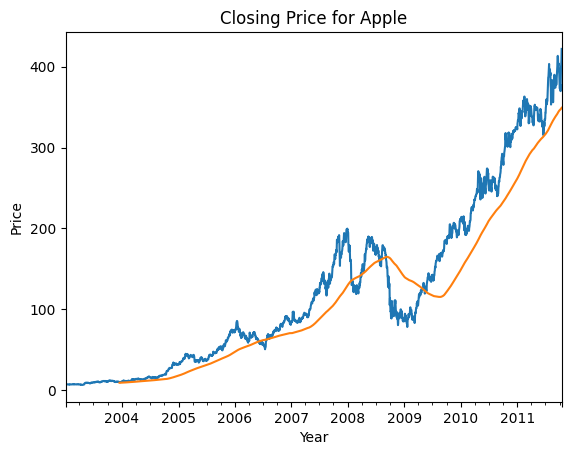

In [199]:
close_px["AAPL"].plot(
    title="Closing Price for Apple",
    xlabel="Year",
    ylabel="Price",
);
close_px["AAPL"].rolling(250).mean().plot();

In [200]:
# min_periods
plt.figure();

<Figure size 640x480 with 0 Axes>

In [201]:
std250 = close_px["AAPL"].pct_change().rolling(250,
                                               min_periods=10).std()
std250[4:20]

2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15         NaN
2003-01-16    0.009628
2003-01-17    0.013818
2003-01-20    0.013233
2003-01-21    0.012679
2003-01-22    0.012283
2003-01-23    0.013622
2003-01-24    0.014468
2003-01-27    0.015664
2003-01-28    0.017145
2003-01-29    0.017650
Freq: B, Name: AAPL, dtype: float64

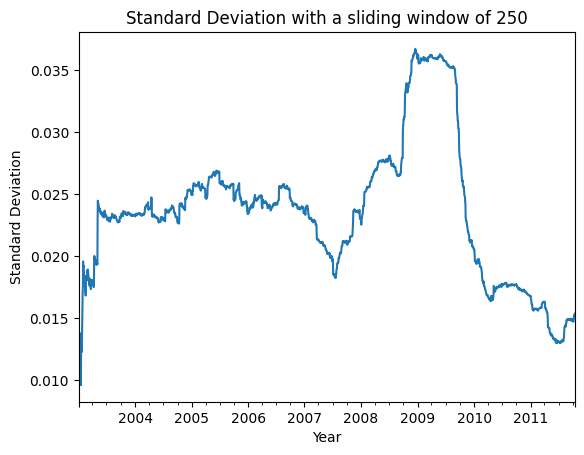

In [202]:
std250.plot(
    title="Standard Deviation with a sliding window of 250",
    xlabel="Year",
    ylabel="Standard Deviation",

);

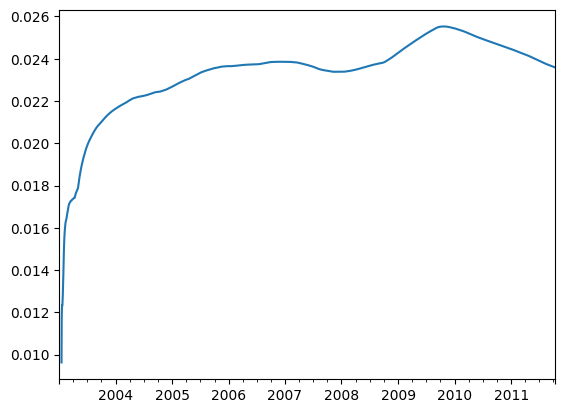

In [203]:
# Expanding window
expanding_mean = std250.expanding().mean()
expanding_mean.plot();

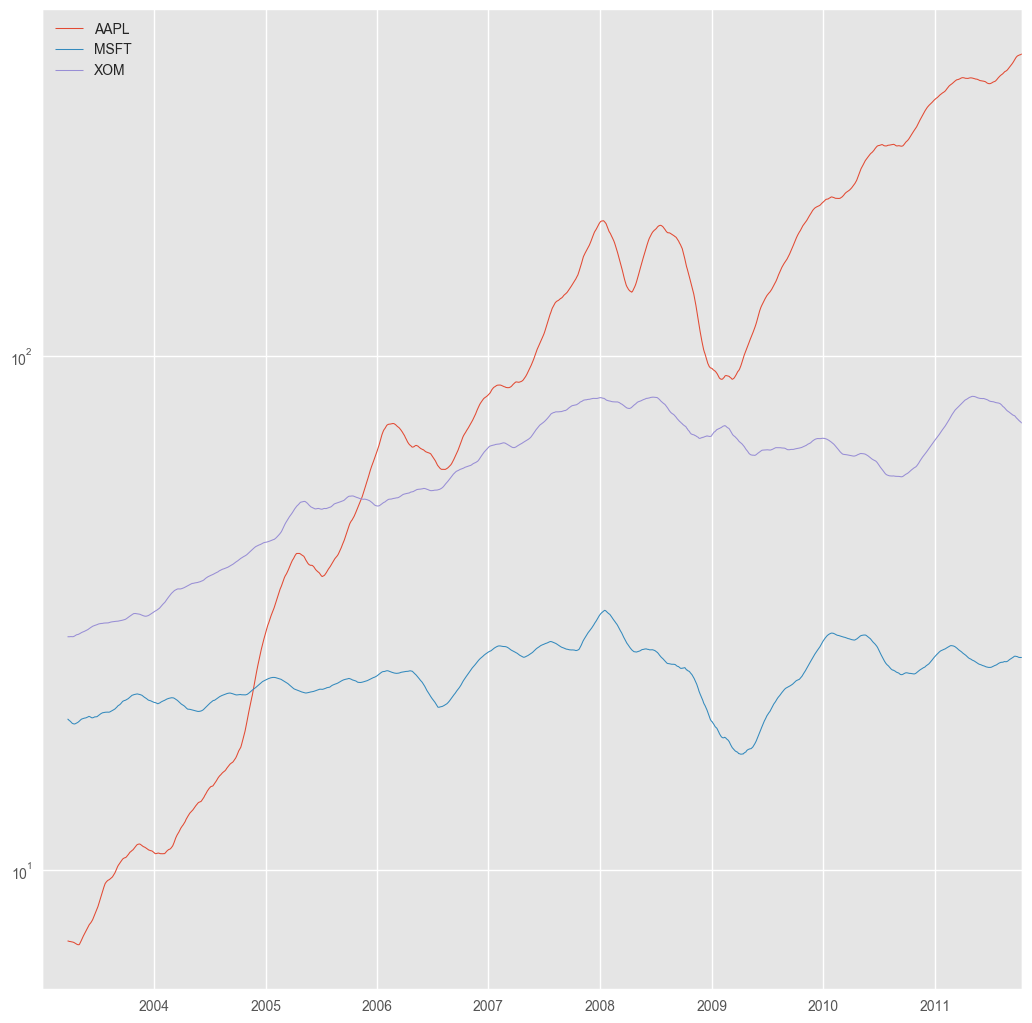

In [307]:
plt.style.use("_classic_test_patch")
close_px.rolling(60).mean().plot(
    figsize=(10, 10),
    logy=True
);

In [308]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [309]:
# Rolling on fixed-frequencies
close_px.rolling("20D").mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


<h4>Exponentially Weighted Moving Average</h4>

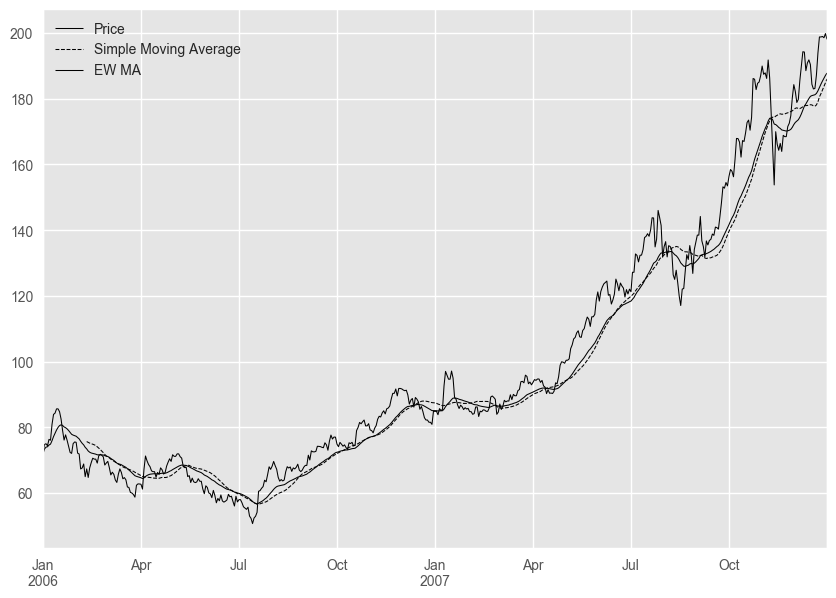

In [326]:
aapl_px = close_px["AAPL"]["2006":"2007"]
ma30 = aapl_px.rolling(30, min_periods=30).mean()
ewma30 = aapl_px.ewm(span=30).mean()
aapl_px.plot(style="k-", label="Price");
ma30.plot(style="k--", label="Simple Moving Average");
ewma30.plot(style="k-", label="EW MA");
plt.legend();
plt.savefig("../Data/ewma.png",
           transparent=True,
            dpi="figure",
           )

In [311]:
ewma30

2006-01-02     71.890000
2006-01-03     73.367667
2006-01-04     73.937767
2006-01-05     74.059619
2006-01-06     74.569360
                 ...    
2007-12-25    184.441771
2007-12-26    185.377786
2007-12-27    186.228897
2007-12-28    187.106387
2007-12-31    187.814362
Freq: B, Name: AAPL, Length: 521, dtype: float64

<h4>Binary Moving Window functions</h4>

In [312]:
spx_px = close_px_all["SPX"]
spx_rets = close_px_all["SPX"]
returns = close_px.pct_change()

In [313]:
plt.rcParams['font.size']=8
plt.rcParams['lines.linewidth']=0.75

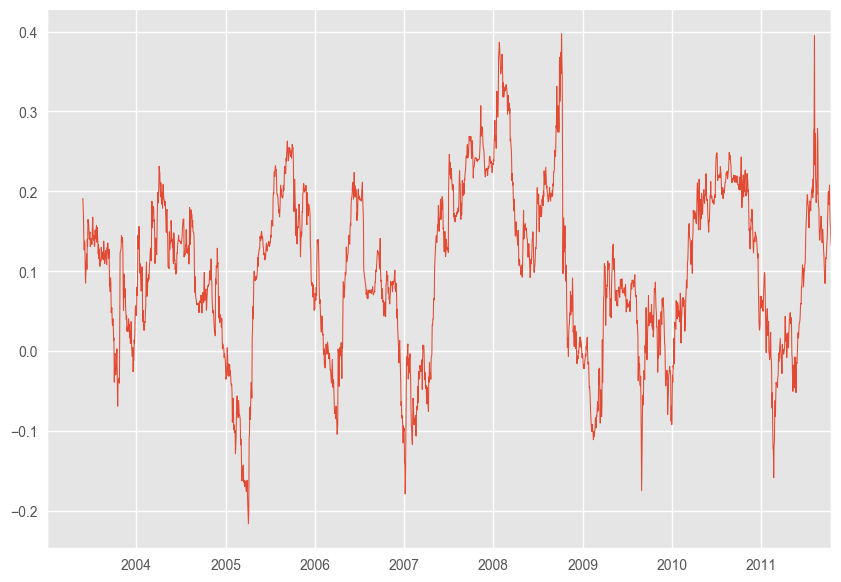

In [318]:
# correlation
corr = returns["AAPL"].rolling(125,
                               min_periods=100).corr(spx_rets)
corr.plot();
plt.savefig("plot.png");

In [315]:
corr = returns.rolling(125,
                       min_periods=100).corr(spx_rets)
corr

,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN
...,...,...,...
2011-10-10,0.177735,0.106015,0.086865
2011-10-11,0.160274,0.104720,0.083941
2011-10-12,0.154650,0.095883,0.070994
2011-10-13,0.140014,0.098744,0.069956


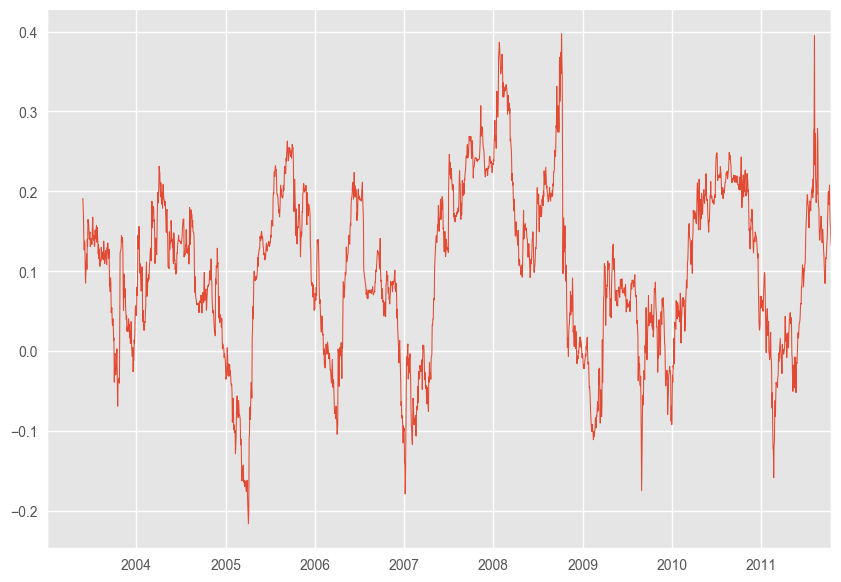

In [320]:
corr.plot();
# plt.savefig("../Data/corr.png");

<h4>User defined moving window</h4>

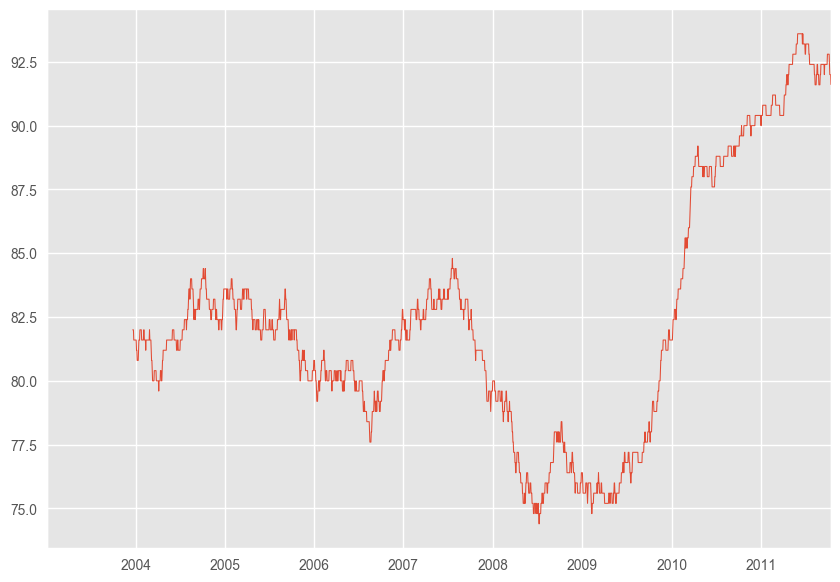

In [317]:
from scipy.stats import percentileofscore
def score_at_2percent(x):
    return percentileofscore(x, 0.02)
result = returns["AAPL"].rolling(250).apply(score_at_2percent)
result.plot();